**Pima Indians Diabetes Database**

The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/Users/saninzulphi/Downloads/dpf.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
# check for missing values
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
data.shape

(100000, 9)

this is the no of rows and columsn that we have in our dataset.

it has 100000 records with 9 different columns

In [8]:
print(data['diabetes'].value_counts())


diabetes
0    91500
1     8500
Name: count, dtype: int64


people with diabetes are marked as 1 and the absence of diabetes are depicted as 0

from the above calculation we can evidently see that the people with diabetes are lesser than people without them.

In [9]:
print(data['smoking_history'].value_counts())


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


this is the category of types of smokers as presented in the selected dataset.

**DATA** **VISUALIZATION**



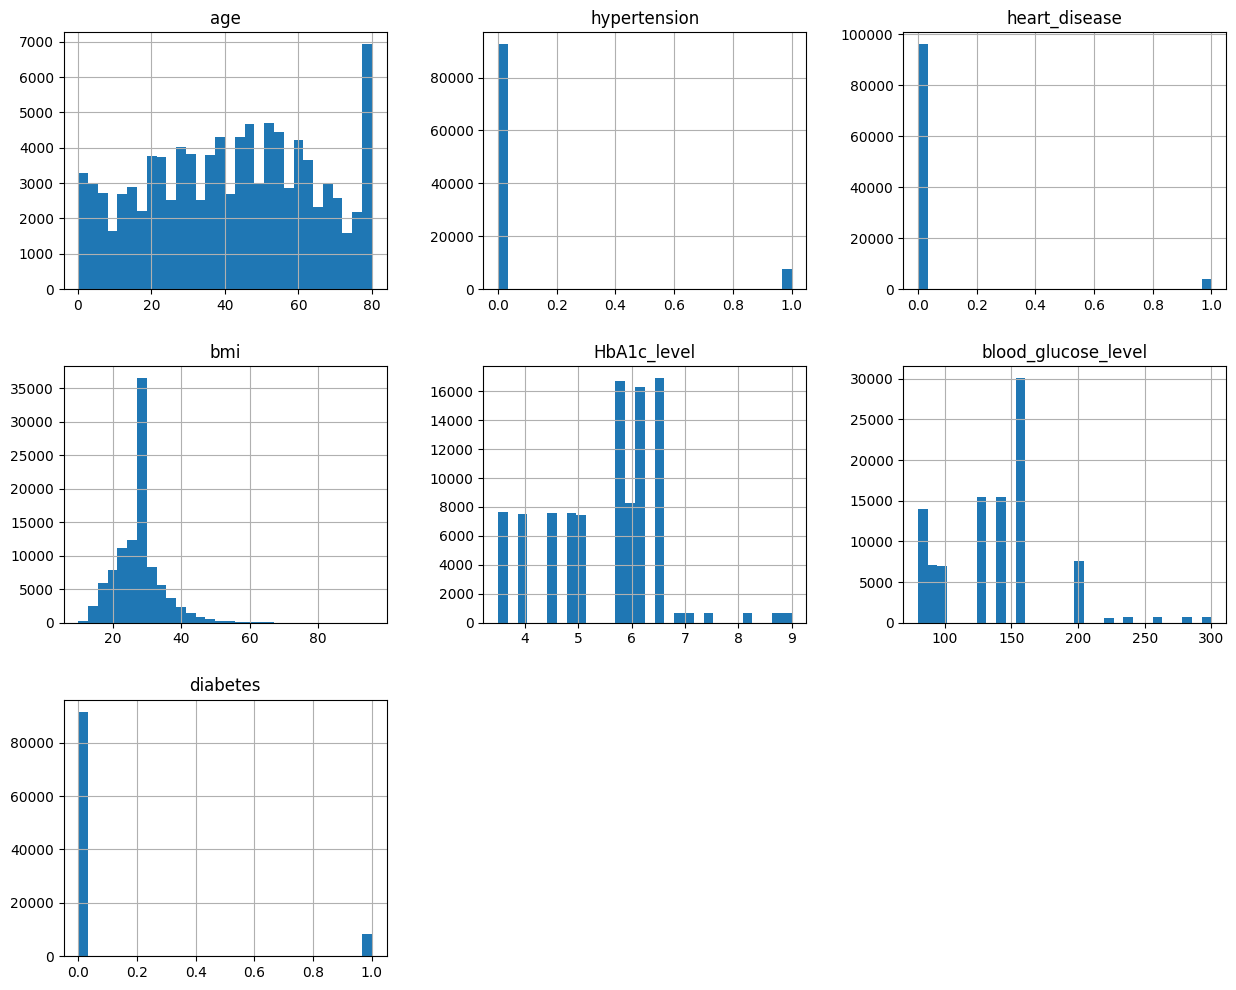

In [10]:
data.hist(bins=30, figsize=(15,12))
plt.show()

this is some basic data visualizations done to understand the data better.

In [11]:
# data analysis of patients of age above 50
over_50=data[data["age"]>50];
over_50.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
10,Female,53.0,0,0,never,27.32,6.1,85,0


Here we can see the data of patients above the age of 50, as they are more prone to diabetes.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Encode 'gender'
data['gender'] = le.fit_transform(data['gender'])  # Female -> 0, Male -> 1

# Encode 'smoking_history'
data['smoking_history'] = le.fit_transform(data['smoking_history'])
# Categories might be encoded as: never -> 0, former -> 1, current -> 2, etc.


In [13]:
data['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

In [14]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [15]:
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

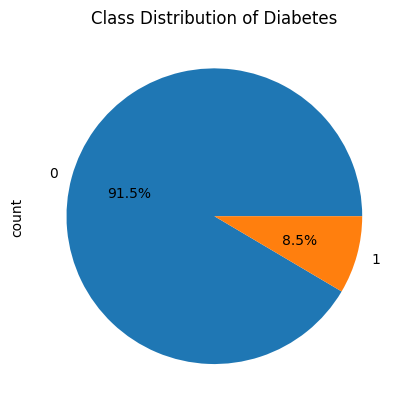

In [16]:
data['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution of Diabetes')
plt.show()

#Heatmap

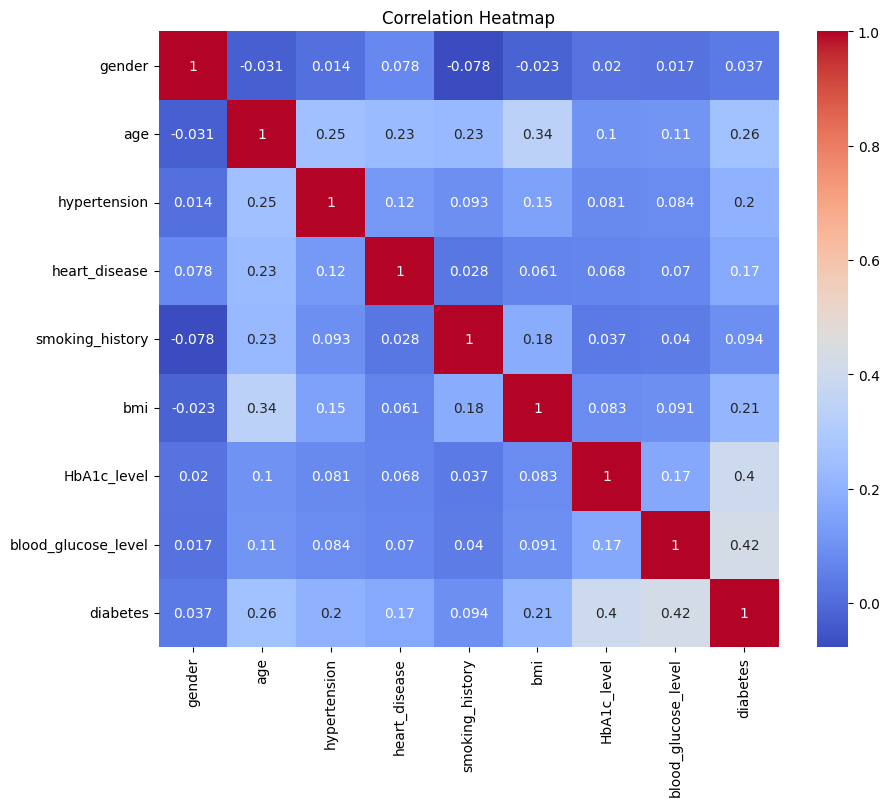

                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_disease              

In [17]:
corr = data.corr()
figure_size = (10, 8)
plt.figure(figsize=figure_size)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(corr)

this is the correlation heatmap. where we can see the only 2 columns with good correlation are HbA1c_level and blood_glucose_level.

Age also has a moderate correlation with diabetes, indicating that diabetes risk increases with age.

BMI has a moderate correlation with diabetes, reflecting that higher body mass index increases the likelihood of developing diabetes.

Gender, smoking history and heart disease doesn’t have a strong correlation with diabetes, suggesting it is not playing a dominant role.

In [18]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [19]:
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

**DATA PREPROCESSING**

In [20]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


then i have used standar scaler to scale the useful columns

StandardScaler standardizes the data by removing the mean and scaling it to unit variance. This helps many machine learning algorithms perform better because they assume features are on a similar scale.

gender, hypertension, heart_disease, and smoking_history are already encoded as categorical features (0 and 1 or 0-4). These do not need scaling.

I haeve also decided to discard the gender, heart_disease, and smoking_history columsn as they are less relevant and may reduce the accuracy of the overall model.

In [21]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0


In [22]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

#splitting the data into train and test set
x = data.drop(['diabetes','smoking_history','heart_disease', 'gender'], axis=1)
y=data['diabetes']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

the logistic regression model even though it is a
basic model give good accuracy of 95 perc. which means that the model correclty classifies the data 95 perc of the time

In [23]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

#predicting the model
y_preds2=rf.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_preds2)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_preds2))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.91      0.70      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [24]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['diabetes'] == 0]
minority_class = data[data['diabetes'] == 1]

# Random undersample majority class
majority_class_undersampled = resample(majority_class,
                                       replace=False,   # Sample without replacement
                                       n_samples=len(minority_class),  # Match minority class count
                                       random_state=42)  # For reproducibility

# Combine minority class with the undersampled majority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Check the new class distribution
print(balanced_data['diabetes'].value_counts())

diabetes
1    8500
0    8500
Name: count, dtype: int64


In [25]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

#splitting the data into train and test set
xbal = balanced_data.drop(['diabetes','smoking_history','heart_disease', 'gender'], axis=1)
ybal =balanced_data['diabetes']

x_train_bal, x_test_bal, y_train_bal, y_test_bal=train_test_split(xbal,ybal, test_size=0.2, random_state=42)

In [26]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_bal, y_train_bal)

#predicting the model
y_predsbal2=rf.predict(x_test_bal)

# Accuracy
accuracy = accuracy_score(y_test_bal, y_predsbal2)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test_bal, y_predsbal2))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1698
           1       0.89      0.90      0.90      1702

    accuracy                           0.90      3400
   macro avg       0.90      0.89      0.89      3400
weighted avg       0.90      0.90      0.89      3400



In [27]:
# Import necessary libraries
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['diabetes'] == 0]  # Class 0 (Majority)
minority_class = data[data['diabetes'] == 1]  # Class 1 (Minority)

# Random oversample (uppersample) minority class
minority_class_oversampled = resample(minority_class,
                                      replace=True,    # Sample with replacement
                                      n_samples=len(majority_class),  # Match the majority class count
                                      random_state=42)  # For reproducibility

# Combine the oversampled minority class with the majority class
balanced_dataUS = pd.concat([majority_class, minority_class_oversampled])

# Shuffle the balanced dataset to mix the classes
balanced_dataUS = balanced_dataUS.sample(frac=1, random_state=42)

# Check the new class distribution
print(balanced_dataUS['diabetes'].value_counts())


diabetes
1    91500
0    91500
Name: count, dtype: int64


In [28]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

#splitting the data into train and test set
xbalUS = balanced_dataUS.drop(['diabetes','smoking_history','heart_disease', 'gender'], axis=1)
ybalUS =balanced_dataUS['diabetes']

x_train_balUS, x_test_balUS, y_train_balUS, y_test_balUS=train_test_split(xbalUS,ybalUS, test_size=0.2, random_state=42)

In [29]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_balUS, y_train_balUS)

#predicting the model
y_predsbal2US=rf.predict(x_test_balUS)

# Accuracy
accuracy = accuracy_score(y_test_balUS, y_predsbal2US)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test_balUS, y_predsbal2US))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18315
           1       0.97      1.00      0.99     18285

    accuracy                           0.99     36600
   macro avg       0.99      0.99      0.99     36600
weighted avg       0.99      0.99      0.99     36600



In [32]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

#splitting the data into train and test set
x = data.drop(['diabetes','smoking_history','heart_disease', 'gender'], axis=1)
y=data['diabetes']

X_resampled, y_resampled = smote.fit_resample(x, y)

x_trainSM, x_testSM, y_trainSM, y_testSM =train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)


In [34]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_trainSM, y_trainSM)

#predicting the model
y_predsSM=rf.predict(x_testSM)

# Accuracy
accuracy = accuracy_score(y_testSM, y_predsSM)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_testSM, y_predsSM))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18293
           1       0.98      0.98      0.98     18307

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



even better accuracy by random forest at 97 perc

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(x_trainSM, y_trainSM)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_predsSM = best_rf.predict(x_testSM)

# Accuracy
accuracy = accuracy_score(y_testSM, y_predsSM)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_testSM, y_predsSM))


Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18293
           1       0.98      0.98      0.98     18307

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



almost same as logistic regression model

#Comparison of the Models

#Inference and Conclusion


### Conclusion:

- The **Random Forest** model is likely the best-performing model based on accuracy for this specific dataset, showing a slightly higher predictive performance.
- Although **SVC** and **Logistic Regression** perform similarly, the choice between them may come down to other factors like interpretability, training time, or computational resources.
- If interpretability is important, **Logistic Regression** might be a preferred choice since it is easier to explain. However, if you are focusing purely on performance, **Random Forest** seems to be the best model for this problem.
- With an accuracy of 0.98 and high precision, recall, and F1-scores, this model is performing exceptionally well, making it highly reliable for classification tasks. The well-optimized hyperparameters contribute to this high performance, and the balanced dataset supports consistent results across both classes.